LINEAR REGRESSION

DATA PREPARATION

In [163]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math

In [ ]:
train = pd.read_csv('Dataset/train_preprocessing.csv')
test = pd.read_csv('Dataset/test_preprocessing.csv')
gender_submission = pd.read_csv('Dataset/gender_submission.csv')
# Merge the test dataframe with the gender_submission dataframe on 'PassengerId'
test = pd.merge(test, gender_submission[['PassengerId', 'Survived']], on='PassengerId', how='left')
test = test.drop(['Survived_x'], axis = 1)
test.rename(columns={'Survived_y': 'Survived'}, inplace=True)
print(test.head())
train = train[train['Survived'] != 'U']
test = test[test['Survived'] != 'U']
validation, test = train_test_split(test, test_size=2/3, random_state=42)

In [160]:
X_train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Title']].values
Y_train = train[['Fare']].values
X_train[:,0] = X_train[:,0].astype(float)
X_validation = validation[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Title']].values
Y_validation = validation[['Fare']].values
X_validation[:,0] = X_validation[:,0].astype(float)
X_test = test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Title']].values
Y_test = test[['Fare']].values
X_test[:,0] = X_test[:,0].astype(float)

In [ ]:
X_train

1. Ordinary Least Squares

In [ ]:
# Scikit-learn model
# Modeling
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_, model.coef_)
# Predict and Test
Y_pred = model.predict(X_test)

res = pd.DataFrame(data=np.concatenate([Y_pred, Y_test, abs(Y_test - Y_pred)], axis=1),
                   columns=["Prediction", "Ground Truth", "Error"])

print(res.head(5))

rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred)
print(f'R2 Score = {r2}')

In [140]:
# Code from scratch
class Linear_Model():
    def init(self):
        self.coef_ = None

    def fit(self, X_train, Y_train):
        X_train = np.array(X_train,dtype=np.float64)
        Y_train = np.array(Y_train,dtype=np.float64)
        A = np.concatenate([np.ones(shape=(X_train.shape[0], 1)), X_train], axis = 1)
        self.coef_ = (np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T), Y_train)).T
        return
    
    def predict(self, X_test):
        A_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
        Y_pred = np.matmul(A_test, self.coef_.T)
        return Y_pred


In [ ]:
OLS_scratch = Linear_Model()
OLS_scratch.fit(X_train, Y_train)
print(OLS_scratch.coef_)
Y_pred_1s = OLS_scratch.predict(X_test)
# Predict and Test
Y_pred = model.predict(X_test)

res = pd.DataFrame(data=np.concatenate([Y_pred_1s, Y_test, abs(Y_test - Y_pred_1s)], axis=1),
                   columns=["Prediction", "Ground Truth", "Error"])

print(res.head(5))

rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_1s))
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_1s)
print(f'R2 Score = {r2}')


2. Ridge Regression

In [ ]:
ridge_model = linear_model.Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)

print(ridge_model.intercept_, ridge_model.coef_)

Y_pred_2 = ridge_model.predict(X_test)
res = pd.DataFrame(data=np.concatenate([Y_pred_2, Y_test, abs(Y_test - Y_pred_2)], axis=1),
                   columns=["Prediction", "Ground Truth", "Error"])
print(res.head(5))

rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_2))
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_2)
print(f'R2 Score = {r2}')

In [152]:
# Code from scratch
class Ridge_Model(Linear_Model):
    def __init__(self, alpha=0):
        Linear_Model.__init__(self)
        self.alpha = alpha

    def fit(self, X_train, Y_train):
        X_train = np.array(X_train,dtype=np.float64)
        Y_train = np.array(Y_train,dtype=np.float64)
        A = np.concatenate([np.ones(shape=(X_train.shape[0], 1)), X_train], axis = 1)
        self.coef_ = (np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A) + self.alpha*np.identity(A.shape[1])), A.T), Y_train)).T

In [ ]:
ridge_2 = Ridge_Model(alpha=0.1)
ridge_2.fit(X_train, Y_train)

print(ridge_2.coef_)

Y_pred_2s = ridge_2.predict(X_test)
res = pd.DataFrame(data=np.concatenate([Y_pred_2s, Y_test, abs(Y_test - Y_pred_2s)], axis=1),
                   columns=["Prediction", "Ground Truth", "Error"])
print(res.head(5))

rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_2s))
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_2s)
print(f'R2 Score = {r2}')

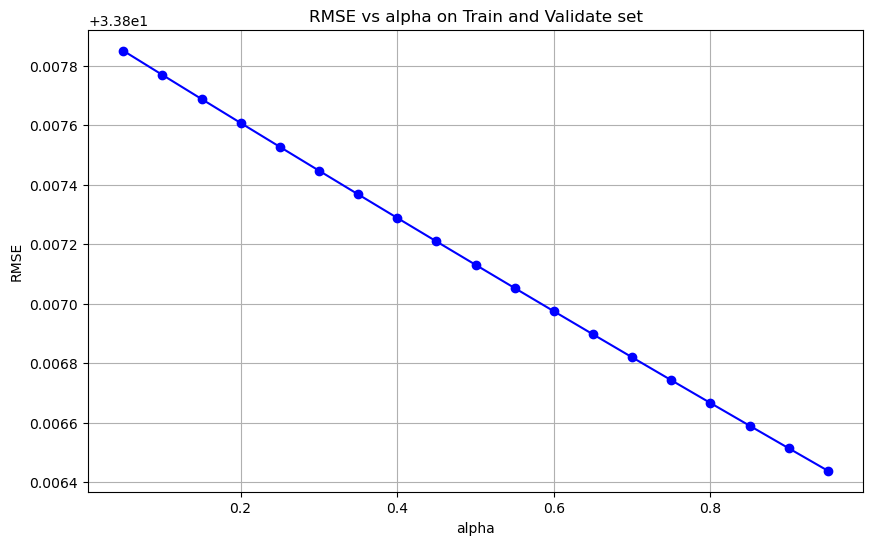

Error on Test set
RMSE = 44.8673949901577
R2 Score = 0.42612730066840876


In [176]:
# Tuning
a = 0.05
alphas = []
rmse = []
best_rmse = float('inf')
best_alpha = a

while a < 1:
    rr = linear_model.Ridge(alpha=a)
    rr.fit(X_train, Y_train)
    pred = rr.predict(X_validation)
    error_rmse = math.sqrt(mean_squared_error(Y_validation, pred))
    alphas.append(a)
    rmse.append(error_rmse)
    
    if error_rmse < best_rmse:
        best_rmse = error_rmse
        best_alpha = a
    
    a += 0.05

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse, marker='o', linestyle='-', color='b')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Train and Validate set')
plt.grid(True)
plt.show()


# Test with best hyperparameter
rr = linear_model.Lasso(alpha = best_alpha)
rr.fit(X_train, Y_train)
Y_pred_3t = rr.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_3t))
print('Error on Test set')
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_3t)
print(f'R2 Score = {r2}')


3. LASSO 

In [ ]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
print(lasso_model.intercept_, lasso_model.coef_)

Y_pred_3 = lasso_model.predict(X_test).reshape(-1, 1)
res = pd.DataFrame(data=np.concatenate([Y_pred_3, Y_test, abs(Y_test - Y_pred_3)], axis=1),
                   columns=["Prediction", "Ground Truth", "Error"])

print(res.head(5))

rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_3))
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_3)
print(f'R2 Score = {r2}')

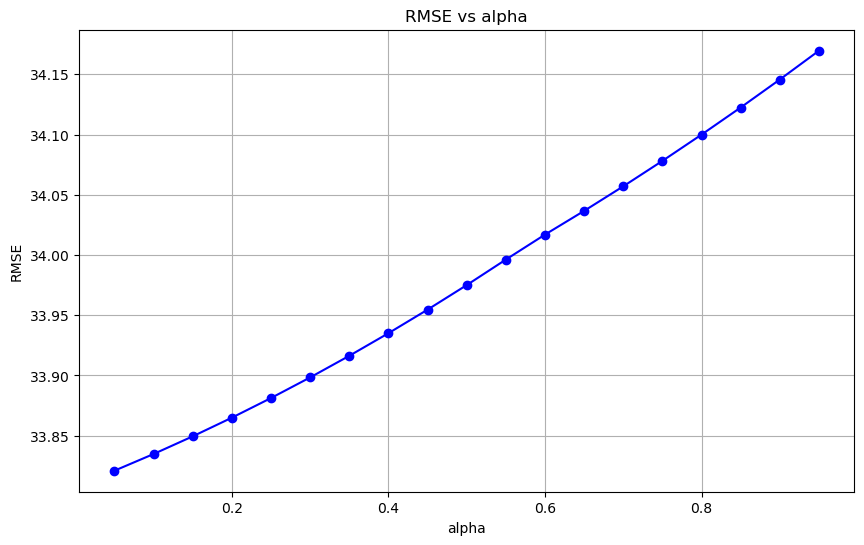

0.05
RMSE = 44.5237657220126
R2 Score = 0.4348839624993468


In [ ]:
# Tuning
a = 0.05
alphas = []
rmse = []
best_rmse = float('inf')
best_alpha = a

while a < 1:
    rr = linear_model.Lasso(alpha=a)
    rr.fit(X_train, Y_train)
    pred = rr.predict(X_validation)
    error_rmse = math.sqrt(mean_squared_error(Y_validation, pred))
    alphas.append(a)
    rmse.append(error_rmse)
    
    if error_rmse < best_rmse:
        best_rmse = error_rmse
        best_alpha = a
    
    a += 0.05

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse, marker='o', linestyle='-', color='b')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha on Train and Validate set')
plt.grid(True)
plt.show()


# Test with best hyperparameter
rr = linear_model.Lasso(alpha = best_alpha)
rr.fit(X_train, Y_train)
Y_pred_3t = rr.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_3t))
print('Error on Test set')
print(f'RMSE = {rmse}')
r2 = r2_score(Y_test, Y_pred_3t)
print(f'R2 Score = {r2}')
